In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style="whitegrid")


In [2]:
# Loading merged dataset
merged = pd.read_csv("merged_trader_sentiment.csv")

print("Data loaded. Shape:", merged.shape)
display(merged.head())


Data loaded. Shape: (211224, 15)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Closed PnL,Fee,Trade_Date,Sentiment_Time,value,classification,date,Sentiment_Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.0,0.345404,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,0.0,0.005600,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,0.0,0.050431,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,0.0,0.050043,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,0.0,0.003055,2024-12-02,2024-12-02 05:30:00,80.0,Extreme Greed,2024-12-02,2024-12-02


In [3]:
# Convert date columns to datetime
merged["Trade_Date"] = pd.to_datetime(merged["Trade_Date"])
merged["Sentiment_Date"] = pd.to_datetime(merged["Sentiment_Date"])
merged["Timestamp IST"] = pd.to_datetime(merged["Timestamp IST"])


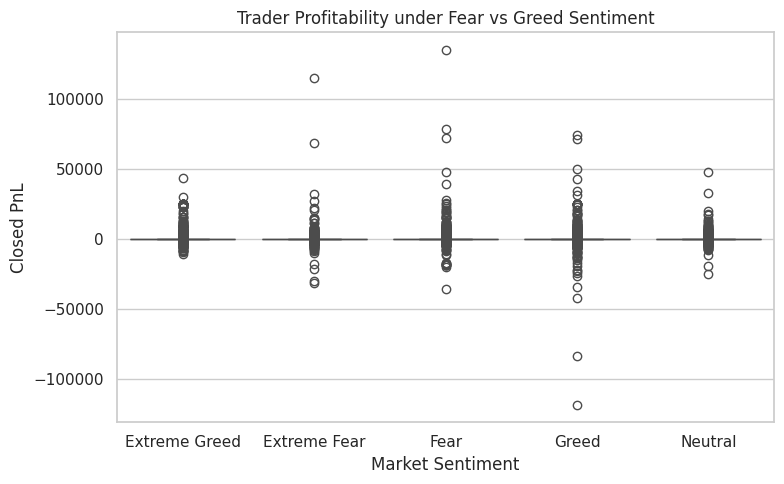

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="Closed PnL", data=merged)
plt.title("Trader Profitability under Fear vs Greed Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig("profitability_vs_sentiment.png")
plt.show()


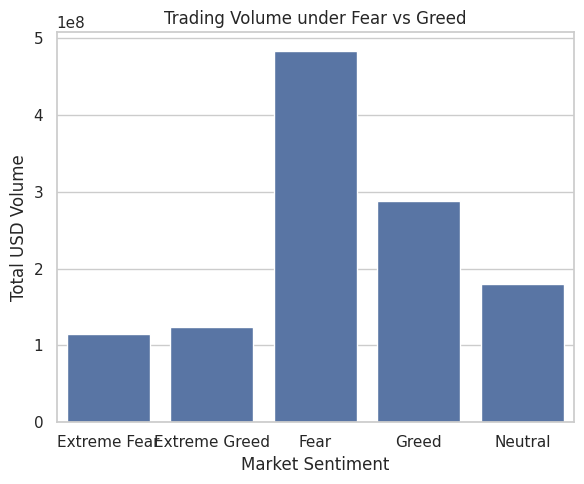

In [5]:
volume_stats = merged.groupby("classification")["Size USD"].sum().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="classification", y="Size USD", data=volume_stats)
plt.title("Trading Volume under Fear vs Greed")
plt.ylabel("Total USD Volume")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig("volume_vs_sentiment.png")
plt.show()


In [6]:
if "leverage" in merged.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=merged, x="leverage",
        hue="classification", bins=30, kde=True,
        palette="Set2"
    )
    plt.title("Distribution of Leverage under Fear vs Greed")
    plt.xlabel("Leverage")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig("leverage_distribution.png")
    plt.show()


In [7]:
fear_pnl = merged[merged["classification"]=="Fear"]["Closed PnL"]
greed_pnl = merged[merged["classification"]=="Greed"]["Closed PnL"]

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var=False, nan_policy="omit")

print("T-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant difference in profitability between Fear and Greed periods")
else:
    print("No significant difference found")


T-test results:
T-statistic: 1.8511431575014454
P-value: 0.06415196288057486
No significant difference found


In [8]:
merged.to_csv("final_analysis_dataset.csv", index=False)
print("Final dataset saved to final_analysis_dataset.csv")


Final dataset saved to final_analysis_dataset.csv
